In [ ]:
'''
Name:- Shreyansh Khokale
College:- MIT Academy of Engineering
Batch:- 5AT14
'''

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# **Loading dataset in collab**

In [4]:
imdb = pd.read_csv("Movie dataset.csv", encoding='latin-1')


# **Exploratory Data Analysis**

In [5]:
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [20]:
imdb.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15478,Zindagi Tere Naam,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
15479,Zindagi Tumse,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15482,Zindagi Zindabad,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana


In [22]:
imdb.shape

(1528, 10)

In [23]:
imdb.size

15280

In [24]:
imdb.stack(level=0)

1      Name                 Gadhvi 
       Year                    2019
       Duration                 109
       Genre                  Drama
       Rating                   7.0
                         ...       
15493  Votes                    408
       Director         Mozez Singh
       Actor 1        Vicky Kaushal
       Actor 2      Sarah Jane Dias
       Actor 3     Raaghavv Chanana
Length: 15280, dtype: object

In [56]:
imdb.iloc[1]

Year                           2004
Duration                         96
Genre                         Drama
Rating                          6.2
Votes                            17
Director                Madhu Ambat
Actor 1              Rati Agnihotri
Actor 2              Gulshan Grover
Actor 3               Atul Kulkarni
Genre_mean_rating          6.420152
Director_encoded                6.2
Actor1_encoded             5.766667
Actor2_encoded                  5.1
Actor3_encoded                  6.2
Name: 10, dtype: object

In [57]:
imdb.iloc[2]

Year                            2016
Duration                         120
Genre                         Horror
Rating                           5.9
Votes                             59
Director             Arshad Siddiqui
Actor 1                 Pankaj Berry
Actor 2                 Anubhav Dhir
Actor 3                 Hritu Dudani
Genre_mean_rating           4.698529
Director_encoded                 5.9
Actor1_encoded                   5.9
Actor2_encoded                   5.9
Actor3_encoded                   5.9
Name: 11, dtype: object

In [25]:
imdb['Duration'].max()

300

In [27]:
imdb['Duration'].min()

45

In [26]:
imdb['Rating'].min()

1.6

In [28]:
imdb['Rating'].max()

9.4

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
imdb.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
nulls = imdb[imdb.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for col in imdb.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(imdb[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [10]:
# Handling the null values
imdb.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

#Extracting only the text part from the Name column
imdb['Name'] = imdb['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column as observed above
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
imdb['Duration'] = pd.to_numeric(imdb['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

# Splitting the genre by , to keep only unique genres and replacing the null values with mode
imdb['Genre'] = imdb['Genre'].str.split(', ')
imdb = imdb.explode('Genre')
imdb['Genre'].fillna(imdb['Genre'].mode()[0], inplace=True)

# Convert 'Votes' to numeric and replace the , to keep only numerical part
imdb['Votes'] = pd.to_numeric(imdb['Votes'].str.replace(',', ''), errors='coerce')

In [11]:
#checking duplicate values by Name and Year

duplicate = imdb.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [12]:
# Dropping the duplicated values by Name
imdb = imdb.drop_duplicates(subset=['Name'], keep=False)

In [13]:
imdb.describe()

,Year,Duration,Rating,Votes
count,1528.000000,1528.000000,1528.000000,1528.000000
mean,1997.972513,123.823953,5.976243,552.479712
std,21.181921,25.108144,1.412547,4311.631841
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.100000,14.000000
50%,2004.000000,126.000000,6.100000,34.000000
75%,2016.000000,140.000000,7.000000,127.250000
max,2021.000000,300.000000,9.400000,101014.000000


In [14]:
imdb.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1528,1528,1528,1528,1528,1528
unique,1528,20,1114,1010,1131,1154
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,789,13,22,12,16


In [17]:
# Find the row with the highest number of votes
max_votes_row = imdb[imdb['Votes'] == imdb['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)
print('\n', '='*100, '\n')


# Find the row with the lowest number of votes
min_votes_row = imdb[imdb['Votes'] == imdb['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_lowest_votes)
print("Number of votes for the movie with the highest votes:", votes_lowest_votes)

Movie with the highest votes: My Name Is Khan
Number of votes for the movie with the highest votes: 101014


Movie with the highest votes: Anmol Sitaare
Number of votes for the movie with the highest votes: 5


In [18]:
# Find the row with the highest rating
max_rating_row = imdb[imdb['Rating'] == imdb['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('\n', '='*100, '\n')


# Find the row with the lowest rating
min_rating_row = imdb[imdb['Rating'] == imdb['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_lowest_rating)
print("Number of votes for the movie with the highest rating:", votes_lowest_rating)

Movie with the highest rating: June
Number of votes for the movie with the highest rating: 18


Movie with the highest rating: Mumbai Can Dance Saalaa
Number of votes for the movie with the highest rating: 43


In [19]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = imdb['Director'].value_counts()

# Find the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('\n', '='*100, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = imdb['Director'].value_counts()

# Find the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the most movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the most movies directed: Kanti Shah
Number of movies directed by Kanti Shah : 13


Director with the most movies directed: Sikandar Khanna
Number of movies directed by Kanti Shah : 1


# **Data Visualization**

In [58]:
imdb['Year'].value_counts()

Year
2017    102
2019     91
2018     90
2015     62
2016     58
       ... 
1934      1
1932      1
1945      1
1933      1
1952      1
Name: count, Length: 90, dtype: int64

<Axes: xlabel='Year'>

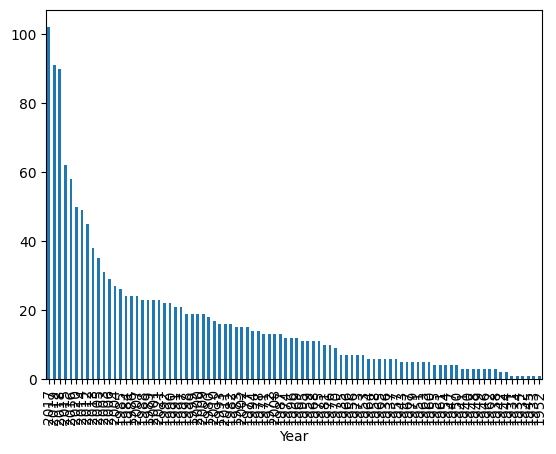

In [59]:
import matplotlib.pyplot as plt
imdb['Year'].value_counts().plot(kind='bar')

In [60]:
imdb['Duration'].value_counts()

Duration
120    66
130    45
135    40
140    38
125    36
       ..
64      1
71      1
177     1
300     1
250     1
Name: count, Length: 136, dtype: int64

<Axes: xlabel='Duration'>

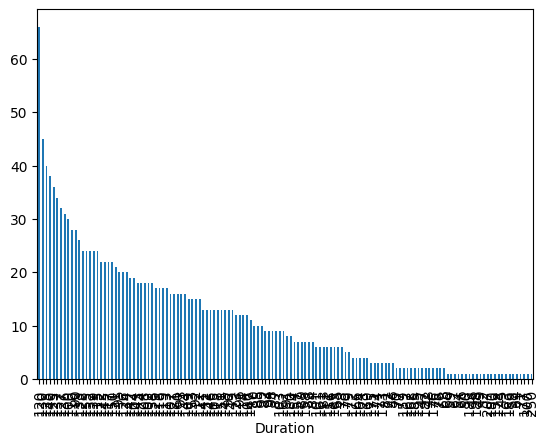

In [61]:
import matplotlib.pyplot as plt
imdb['Duration'].value_counts().plot(kind='bar')

In [62]:
imdb['Rating'].value_counts()

Rating
6.6    55
6.8    51
6.7    51
6.5    48
6.9    48
       ..
9.4     2
3.0     1
2.1     1
1.7     1
1.6     1
Name: count, Length: 76, dtype: int64

<Axes: xlabel='Rating'>

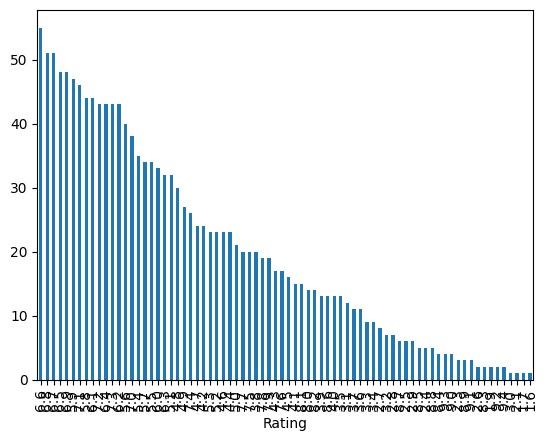

In [63]:
import matplotlib.pyplot as plt
imdb['Rating'].value_counts().plot(kind='bar')

# *Univariate Analysis*

In [29]:
fig_year = px.histogram(imdb, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_year.show()

In [30]:
fig_duration = px.histogram(imdb, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_duration.show()

In [31]:
fig_rating = px.histogram(imdb, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [32]:
fig_votes = px.box(imdb, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()

# *Bivariate Analysis*

In [33]:
year_avg_rating = imdb.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 10 Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

In [34]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in ratings across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [35]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Votes', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in votes across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [36]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genres = imdb['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre", color_discrete_sequence=['#559C9E', '#0B1F26', '#00CC96'])

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

# Show the plot
fig.show()

In [37]:
fig_dur_rat = px.scatter(imdb, x = 'Duration', y = 'Rating', trendline='ols', color = "Rating", color_continuous_scale = "darkmint")
fig_dur_rat.update_layout(title='Does length of movie have any impact on rating?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Rating of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_rat.show()

In [38]:
fig_dur_votes = px.scatter(imdb, x = 'Duration', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_dur_votes.update_layout(title='Does length of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_votes.show()

In [39]:
fig_rat_votes = px.scatter(imdb, x = 'Rating', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_rat_votes.update_layout(title='Does Ratings of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Ratings of Movies', yaxis_title='Votes of movies', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_rat_votes.show()

# **Data Preprocessing**

In [40]:
# Dropping non essential columns
imdb.drop('Name', axis = 1, inplace = True)

*Feature Engineering*

In [41]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = imdb.groupby('Genre')['Rating'].transform('mean')
imdb['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb.groupby('Director')['Rating'].transform('mean')
imdb['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb.groupby('Actor 1')['Rating'].transform('mean')
imdb['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb.groupby('Actor 2')['Rating'].transform('mean')
imdb['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb.groupby('Actor 3')['Rating'].transform('mean')
imdb['Actor3_encoded'] = actor3_mean_rating

*Splitting into training and testing*

In [42]:
# Keeping the predictor and target variable

X = imdb[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb['Rating']


In [43]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Training**

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [47]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [48]:
# Support Vector Machine Regressor
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [49]:
# AdaBoost Regressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

In [50]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# **Model Evaluation**

In [51]:
# Evaluating the performance of trained algorithms
def evaluate_model(name, y_test, predictions):
    print(f'The performance evaluation of {name} is below:', '\n')
    print('Mean squared error:', mean_squared_error(y_test, predictions))
    print('Mean absolute error:', mean_absolute_error(y_test, predictions))
    print('R2 score:', r2_score(y_test, predictions))
    print('\n', '='*100, '\n')

evaluate_model('Linear Regression', y_test, lr_pred)
evaluate_model('Random Forest Regressor', y_test, rf_pred)
evaluate_model('Support Vector Machine Regressor', y_test, svm_pred)
evaluate_model('AdaBoost Regressor', y_test, ada_pred)
evaluate_model('K-Nearest Neighbors Regressor', y_test, knn_pred)

The performance evaluation of Linear Regression is below: 

Mean squared error: 0.13007622782536266
Mean absolute error: 0.25079940977248283
R2 score: 0.935188545523222


The performance evaluation of Random Forest Regressor is below: 

Mean squared error: 0.11555206862745082
Mean absolute error: 0.1919117647058822
R2 score: 0.9424253165951256


The performance evaluation of Support Vector Machine Regressor is below: 

Mean squared error: 2.0054389638508834
Mean absolute error: 1.111793329888834
R2 score: 0.000775020274415561


The performance evaluation of AdaBoost Regressor is below: 

Mean squared error: 0.18251348243709078
Mean absolute error: 0.31674835025329373
R2 score: 0.9090612907821172


The performance evaluation of K-Nearest Neighbors Regressor is below: 

Mean squared error: 1.4204640522875815
Mean absolute error: 0.9357516339869281
R2 score: 0.29224315003709167




# **Model Testing**

In [52]:
# Checking a sample of predictor values on whom the model is trained
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.420152,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.420152,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.420152,6.525,6.900000,6.866667,5.700
32,1993,15,168,6.420152,5.400,5.600000,6.400000,5.825


In [53]:
# Checking the rating according to above predictor variables
y.head()

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64

In [54]:
# Creating a new dataframe with values close to the 3rd row according to the sample above

data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

In [55]:
# Predict the movie rating
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.861999999999994
